# Introduction:
- Context: The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository
- Content:
     - Title: Auto-Mpg Data

- This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

- "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

- Attribute Information:

    - mpg: continuous
    - cylinders: multi-valued discrete
    - displacement: continuous
    - horsepower: continuous
    - weight: continuous
    - acceleration: continuous
    - model year: multi-valued discrete
    - origin: multi-valued discrete
    - car name: string (unique for each instance)


# Importing the libraries

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso

In [2]:
df=pd.read_csv("auto-mpg.csv")

In [3]:
#view of first five rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#view of last five rows
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
#some of the statastical info
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
#some of the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
#print of shape of df
df.shape

(398, 9)

In [8]:
#print of columns
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [9]:
#var matrix
df.var()

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
dtype: float64

In [10]:
#corr matrix
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [11]:
#checking of missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [12]:
#encoding
df = pd.get_dummies(df, columns=['car name'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130,3504,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52,2130,24.6,82,2,0,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.horsepower.value_counts().unique()

array([22, 20, 19, 18, 17, 14, 12, 10,  9,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [14]:
df.drop('horsepower',axis='columns', inplace=True)

In [15]:
df

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,car name_amc ambassador sst,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,2130,24.6,82,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,2295,11.6,82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,2625,18.6,82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='mpg', ylabel='count'>

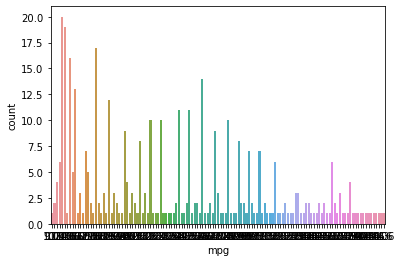

In [16]:
sns.countplot(x='mpg',data=df)

<AxesSubplot:xlabel='cylinders', ylabel='count'>

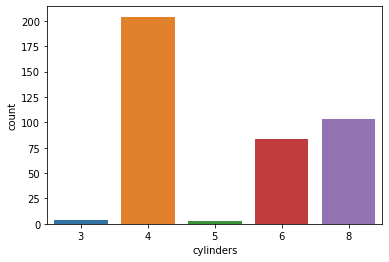

In [17]:
sns.countplot(x='cylinders',data=df)

<AxesSubplot:xlabel='displacement', ylabel='count'>

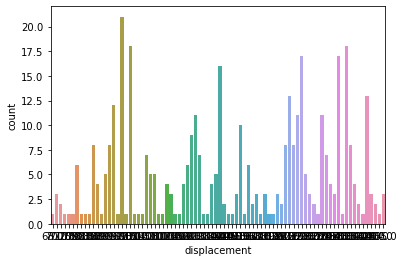

In [18]:
sns.countplot(x='displacement', data=df)

<AxesSubplot:xlabel='weight', ylabel='count'>

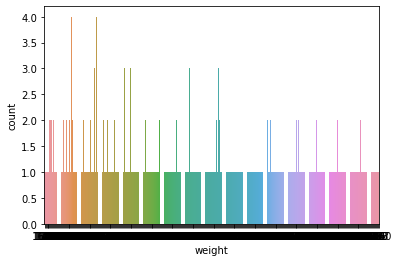

In [19]:
sns.countplot(x='weight',data=df)

<AxesSubplot:xlabel='acceleration', ylabel='count'>

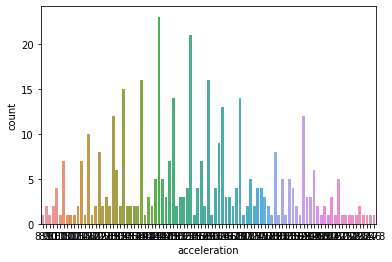

In [20]:
sns.countplot(x='acceleration',data=df)

<AxesSubplot:xlabel='model year', ylabel='count'>

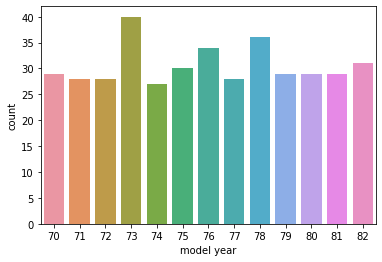

In [21]:
sns.countplot(x= 'model year', data=df)

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

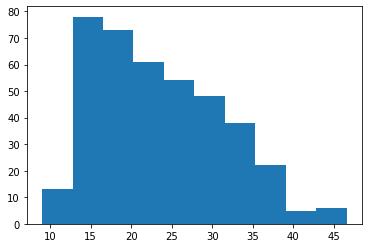

In [23]:
 plt.hist(df['mpg'])

(array([  4.,   0., 204.,   0.,   3.,   0.,  84.,   0.,   0., 103.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

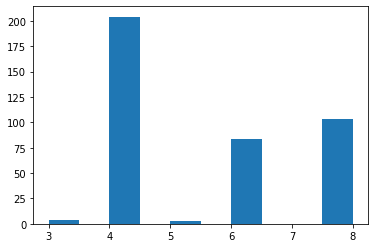

In [24]:
plt.hist(df['cylinders'])

(array([107.,  89.,  31.,  13.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

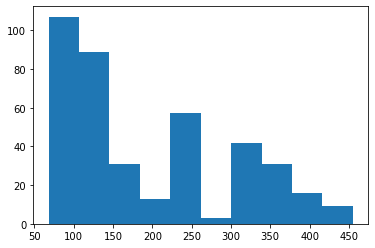

In [25]:
plt.hist(df['displacement'])

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

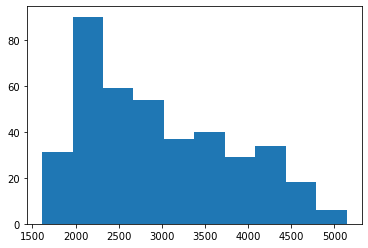

In [26]:
plt.hist(df['weight'])

(array([ 6., 15., 50., 86., 92., 80., 45., 13.,  7.,  4.]),
 array([ 8.  ,  9.68, 11.36, 13.04, 14.72, 16.4 , 18.08, 19.76, 21.44,
        23.12, 24.8 ]),
 <BarContainer object of 10 artists>)

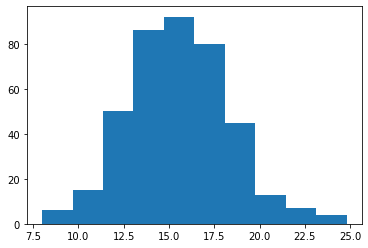

In [27]:
plt.hist(df['acceleration'])

(array([57., 28., 40., 27., 30., 62., 36., 29., 29., 60.]),
 array([70. , 71.2, 72.4, 73.6, 74.8, 76. , 77.2, 78.4, 79.6, 80.8, 82. ]),
 <BarContainer object of 10 artists>)

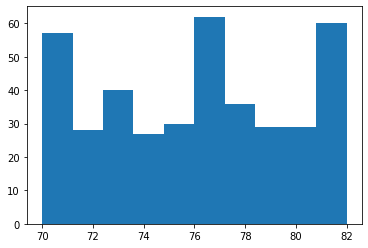

In [28]:
plt.hist(df['model year'])

In [35]:
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [36]:
#splitting into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)

Random forest regressor
- A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [38]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)
regressor.fit(X_train,y_train)
test_data_prediction = regressor.predict(X_test)
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8747275424730756


linear regression
- Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.

In [39]:
regressor= LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression()

In [40]:
y_pred= regressor.predict(X_test)

In [42]:
print('Train Score: ', regressor.score(X_train, y_train))  

Train Score:  0.9913394166672107


Lasso regression
- Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.

In [44]:
model = Lasso(alpha=1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Train Score: ', model.score(X_train, y_train))  

Train Score:  0.797450859009941


# Conclusion:
Hence, the accuracy of Linear regression is more, this model is used to build the model.